In [2]:
import numpy as np
from matplotlib import pyplot as plt

from dftpy.ions import Ions
from dftpy.field import DirectField
from dftpy.grid import DirectGrid
from dftpy.functional import LocalPseudo, Functional, TotalFunctional, ExternalPotential
from dftpy.formats import io
from dftpy.math_utils import ecut2nr
from dftpy.optimization import Optimization

from ase.build import bulk
from ase.lattice.spacegroup import Spacegroup
from ase.lattice.spacegroup import crystal

import pickle

/home/valeria/anaconda3/lib/python3.9/site-packages/ase/lattice/spacegroup.py:5: UserWarning: Moved to ase.spacegroup
  warnings.warn('Moved to ase.spacegroup')


In [3]:
path_pp='/home/valeria/Desktop/programs/dftpy/examples/ofpp/EAC/upf/blps/'
file1='si.lda.upf'
PP_list = {'Si': path_pp+file1}

In [4]:
KS_TE = []
for i in np.arange(0,30,1):
    with open('/home/valeria/Documents/DFTPY/Fitting_densities/Si7-CD/DATA2/Si'+str(i)+'.out') as D:
        k = [match for match in D if "Total energy" in match]
    KS_te = str(k).split()[6]
    KS_TE.append(float(KS_te)) 

In [5]:
rho0 = np.load('/home/valeria/Documents/DFTPY/Fitting_densities/Si7-CD/DATA2/rho0.npy')

In [9]:
l = np.linspace(0.8, 1.4, 30)
rho00 = np.asarray(rho0)
XC = Functional(type='XC',name='LDA')
HARTREE = Functional(type='HARTREE')

ENERGY = []
VOLUME = []
for n in np.arange(0, 30, 1):
        i = int(n)
        KE = Functional(type='KEDF',name='WT', rho0=rho00[i])
        si = bulk('Si', 'diamond', a=5.43, cubic=True)
        si.pop(i=1)
        ions = Ions.from_ase(si)
        cell = ions.get_cell()
        ions.set_cell(cell * l[i], scale_atoms=True)
        ions.set_charges(4)
        nr = ecut2nr(ecut=25, lattice=ions.cell)
        grid = DirectGrid(lattice=ions.cell, nr=nr)
        rho_ini = DirectField(grid=grid)
        rho_ini[:] = ions.get_ncharges()/ions.cell.volume
        PSEUDO = LocalPseudo(grid = grid, ions=ions, PP_list=PP_list, rcut=10)
        evaluator = TotalFunctional(KE=KE, XC=XC, HARTREE=HARTREE, PSEUDO=PSEUDO)        
        optimization_options = {'econv' : 1e-5*ions.nat}
        opt = Optimization(EnergyEvaluator=evaluator, optimization_options = optimization_options, 
                           optimization_method = 'TN')
        rho = opt.optimize_rho(guess_rho=rho_ini)
        energy = evaluator.Energy(rho=rho, ions=ions)
        vol=ions.get_volume()
        ENERGY.append(energy)
        VOLUME.append(vol)

setting key: Si -> /home/valeria/Desktop/programs/dftpy/examples/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       1.069037940720E+01      1.069038E+01    9.627248E+00    1       1       4.624987E-02    
1       7.059163633847E+00      -3.631216E+00   5.850086E-01    12      2       2.061496E-01    
2       6.919199771731E+00      -1.399639E-01   2.882885E-02    8       1       3.479936E-01    
3       6.915816772189E+00      -3.383000E-03   2.537059E-03    6       1       4.168096E-01    
4       6.915520002410E+00      -2.967698E-04   2.278560E-04    7       1       4.968743E-01    
5       6.915501202310E+00      -1.880010E-05   1.495796E-05    5       1       5.483921E-01    
6       6.915498131341E+00      -3.070969E-06   9.760574E-07    8       1       6.389029E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.4571708186886257
Chemical potential (eV)  : 12.4402504393882

Chemical potential (a.u.): 0.2124052930655236
Chemical potential (eV)  : 5.77984187172379
setting key: Si -> /home/valeria/Desktop/programs/dftpy/examples/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       4.908615370479E+00      4.908615E+00    7.799938E+00    1       1       1.211140E-01    
1       6.582536933111E-01      -4.250362E+00   4.349228E+00    12      2       3.552425E-01    
2       2.906973877844E-01      -3.675563E-01   3.658981E-01    5       1       5.358872E-01    
3       2.401061052108E-01      -5.059128E-02   2.471810E-02    8       1       7.193108E-01    
4       2.383078683074E-01      -1.798237E-03   2.091379E-03    5       1       8.606386E-01    
5       2.379865634377E-01      -3.213049E-04   1.907089E-04    7       1       1.036633E+00    
6       2.379697820291E-01      -1.678141E-05   1.445904E-05    5       1       1.234504E+00    
7       2.379669210797E-01      -2.86094

1       -1.135902580070E+00     -3.411978E+00   2.363769E+01    15      4       6.033099E-01    
2       -3.294724427166E+00     -2.158822E+00   1.247061E+00    8       1       8.890100E-01    
3       -3.375013191861E+00     -8.028876E-02   8.117194E-02    4       1       1.086852E+00    
4       -3.387199137977E+00     -1.218595E-02   5.309641E-03    10      1       1.388630E+00    
5       -3.387619762262E+00     -4.206243E-04   3.256644E-04    8       1       1.649396E+00    
6       -3.387668411788E+00     -4.864953E-05   1.771405E-05    10      1       1.936836E+00    
7       -3.387671072337E+00     -2.660549E-06   1.611128E-06    8       1       2.212937E+00    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.0569705845619808
Chemical potential (eV)  : 1.5502484206282925
setting key: Si -> /home/valeria/Desktop/programs/dftpy/examples/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)       

2       -5.819470290387E+00     -9.195498E-01   8.284556E-01    5       1       4.463301E-01    
3       -6.057520183500E+00     -2.380499E-01   7.525674E-02    8       1       7.423418E-01    
4       -6.074835603977E+00     -1.731542E-02   4.589508E-03    10      1       1.137755E+00    
5       -6.075610771902E+00     -7.751679E-04   4.157309E-04    7       1       1.360530E+00    
6       -6.075727102149E+00     -1.163302E-04   3.819194E-05    12      1       1.645016E+00    
7       -6.075730213282E+00     -3.111133E-06   2.946706E-06    6       1       1.811038E+00    
8       -6.075730654523E+00     -4.412408E-07   2.612722E-07    8       1       2.084113E+00    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.02466814174175367
Chemical potential (eV)  : -0.6712542633889179
setting key: Si -> /home/valeria/Desktop/programs/dftpy/examples/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)    

!WARN : pAp small than zero :iter =  4 -292.3491681593541
1       -7.123831684290E+00     -6.915034E+00   1.097493E+01    5       2       3.313127E-01    
2       -7.840164539620E+00     -7.163329E-01   1.078816E+00    3       1       5.493889E-01    
3       -8.171120498531E+00     -3.309560E-01   1.036709E-01    15      2       1.105315E+00    
4       -8.178418356273E+00     -7.297858E-03   6.762977E-03    5       1       1.345267E+00    
5       -8.179566347573E+00     -1.147991E-03   5.537391E-04    9       1       1.716076E+00    
6       -8.179660002469E+00     -9.365490E-05   4.325887E-05    12      1       2.194423E+00    
7       -8.179663993259E+00     -3.990790E-06   3.092431E-06    6       1       2.429175E+00    
8       -8.179664526191E+00     -5.329315E-07   2.782488E-07    10      1       2.766097E+00    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.07483013522825771
Chemical potential (eV)  : -2.0362315016585586


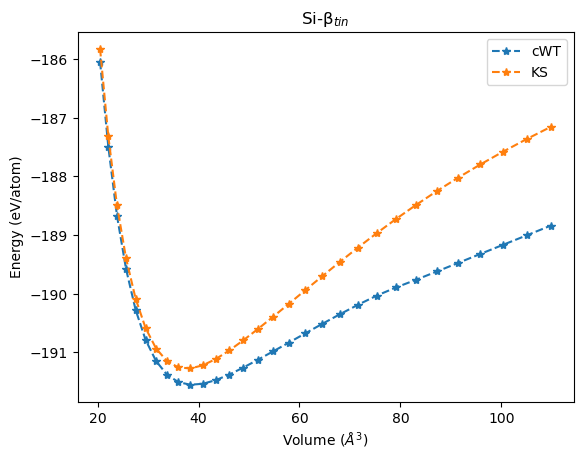

In [10]:
plt.plot(np.asarray(VOLUME)*0.529177**3/4,(np.asarray(ENERGY))*27.211407/4,'*--')
plt.plot(np.asarray(VOLUME)*0.529177**3/4, np.asarray(KS_TE)*27.211407/8,'*--')
plt.xlabel('Volume ($\AA^{3}$)')
plt.ylabel('Energy (eV/atom)')
plt.title('Si-\u03B2$_{tin}$')
plt.legend(['cWT','KS'])